In [12]:
import numpy as np
from qs_mps.utils import load_list_of_lists, tensor_shapes
from qs_mps.mps_class import MPS
import matplotlib.pyplot as plt
import matplotlib as mpl
%load_ext autoreload
%autoreload 2

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fluxtube of the electric field

In [17]:
# initialize parameters
path_tensor = "/Users/fradm/Desktop/projects/1_Z2"
charges_x = [1,9]
charges_y = [3,3]
precision = 3
interval = np.linspace(0.5,0.7,101)
L = 11
l = 6
chi = 64
endens, correl = False, True

In [21]:
def compute_correlation_function_vacuum():
    corr_vacuum = []
    for h in interval:
        print(f"Correlator - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_vacuum.append(corr)
    return corr_vacuum

def compute_electric_energy_density_vacuum():
    eed_vacuum = []
    for h in interval:
        print(f"Energy Density - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_vacuum.append(eed)
    return eed_vacuum


def compute_correlation_function_charges():
    corr_charges = []
    for h in interval:
        print(f"Correlator - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_charges.append(corr)
    return corr_charges

def compute_electric_energy_density_charges():
    eed_charges = []
    for h in interval:
        print(f"Energy Density - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_charges.append(eed)
    return eed_charges

In [22]:
if endens:
    # compute the connected electric energy density
    eed_charges = compute_electric_energy_density_charges()
    eed_vacuum = compute_electric_energy_density_vacuum()
    eed_conn = (np.array(eed_charges) - np.array(eed_vacuum))

if correl:
    # compute the connected correlation function
    corr_charges = compute_correlation_function_charges()
    corr_vacuum = compute_correlation_function_vacuum()
    corr_conn = (np.array(corr_charges) - np.array(corr_vacuum))


Correlator - charges for h: 0.5
Correlator - charges for h: 0.502


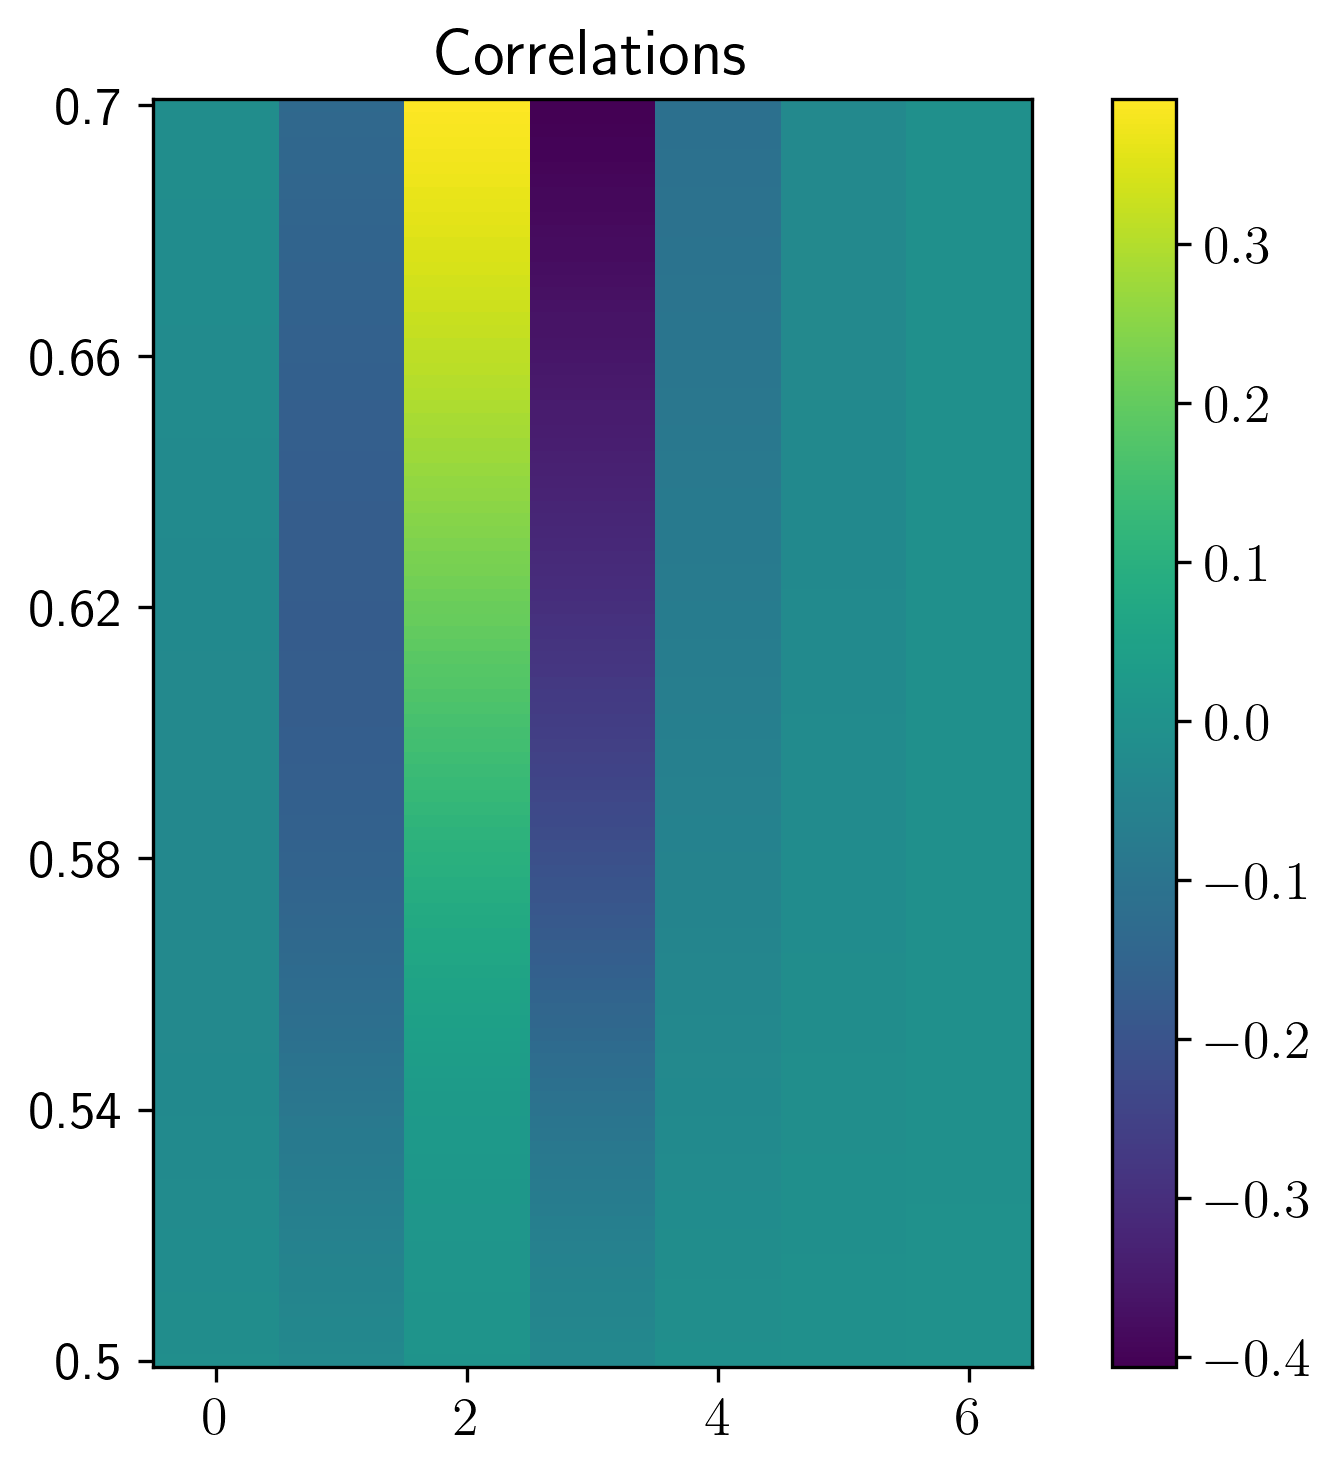

In [ ]:
# plt.title(f"Energy density")
# plt.imshow(eed_conn, aspect='auto', origin='lower', norm=mpl.colors.LogNorm())

plt.title(f"Correlations")
plt.imshow(corr_conn, aspect=0.1, origin='lower')

plt.yticks(ticks=np.linspace(0,100,101)[::(len(interval)//5)], labels=[round(h,2) for h in interval[::(len(interval)//5)]])
plt.colorbar()
plt.show()

## String width

We find the string width as follows

$$\sigma^2 = \frac{\sum_x x^2 \mathcal{E}(x)}{\sum_x \mathcal{E}(x)}$$

In [10]:
# we find the string width as a normalized sum of the electric energy density for the position squared
eed_string = []
xs = [i for i in range(-l//2,l//2+1,) if i!=0]
for eed_lad in eed_conn:
    eed_sum_lad = 0
    for x, eed_x in zip(xs, eed_lad):
        eed_sum_lad += eed_x * ((x)**2)
    eed_sum_lad = eed_sum_lad / sum(eed_lad)
    eed_string.append(eed_sum_lad)


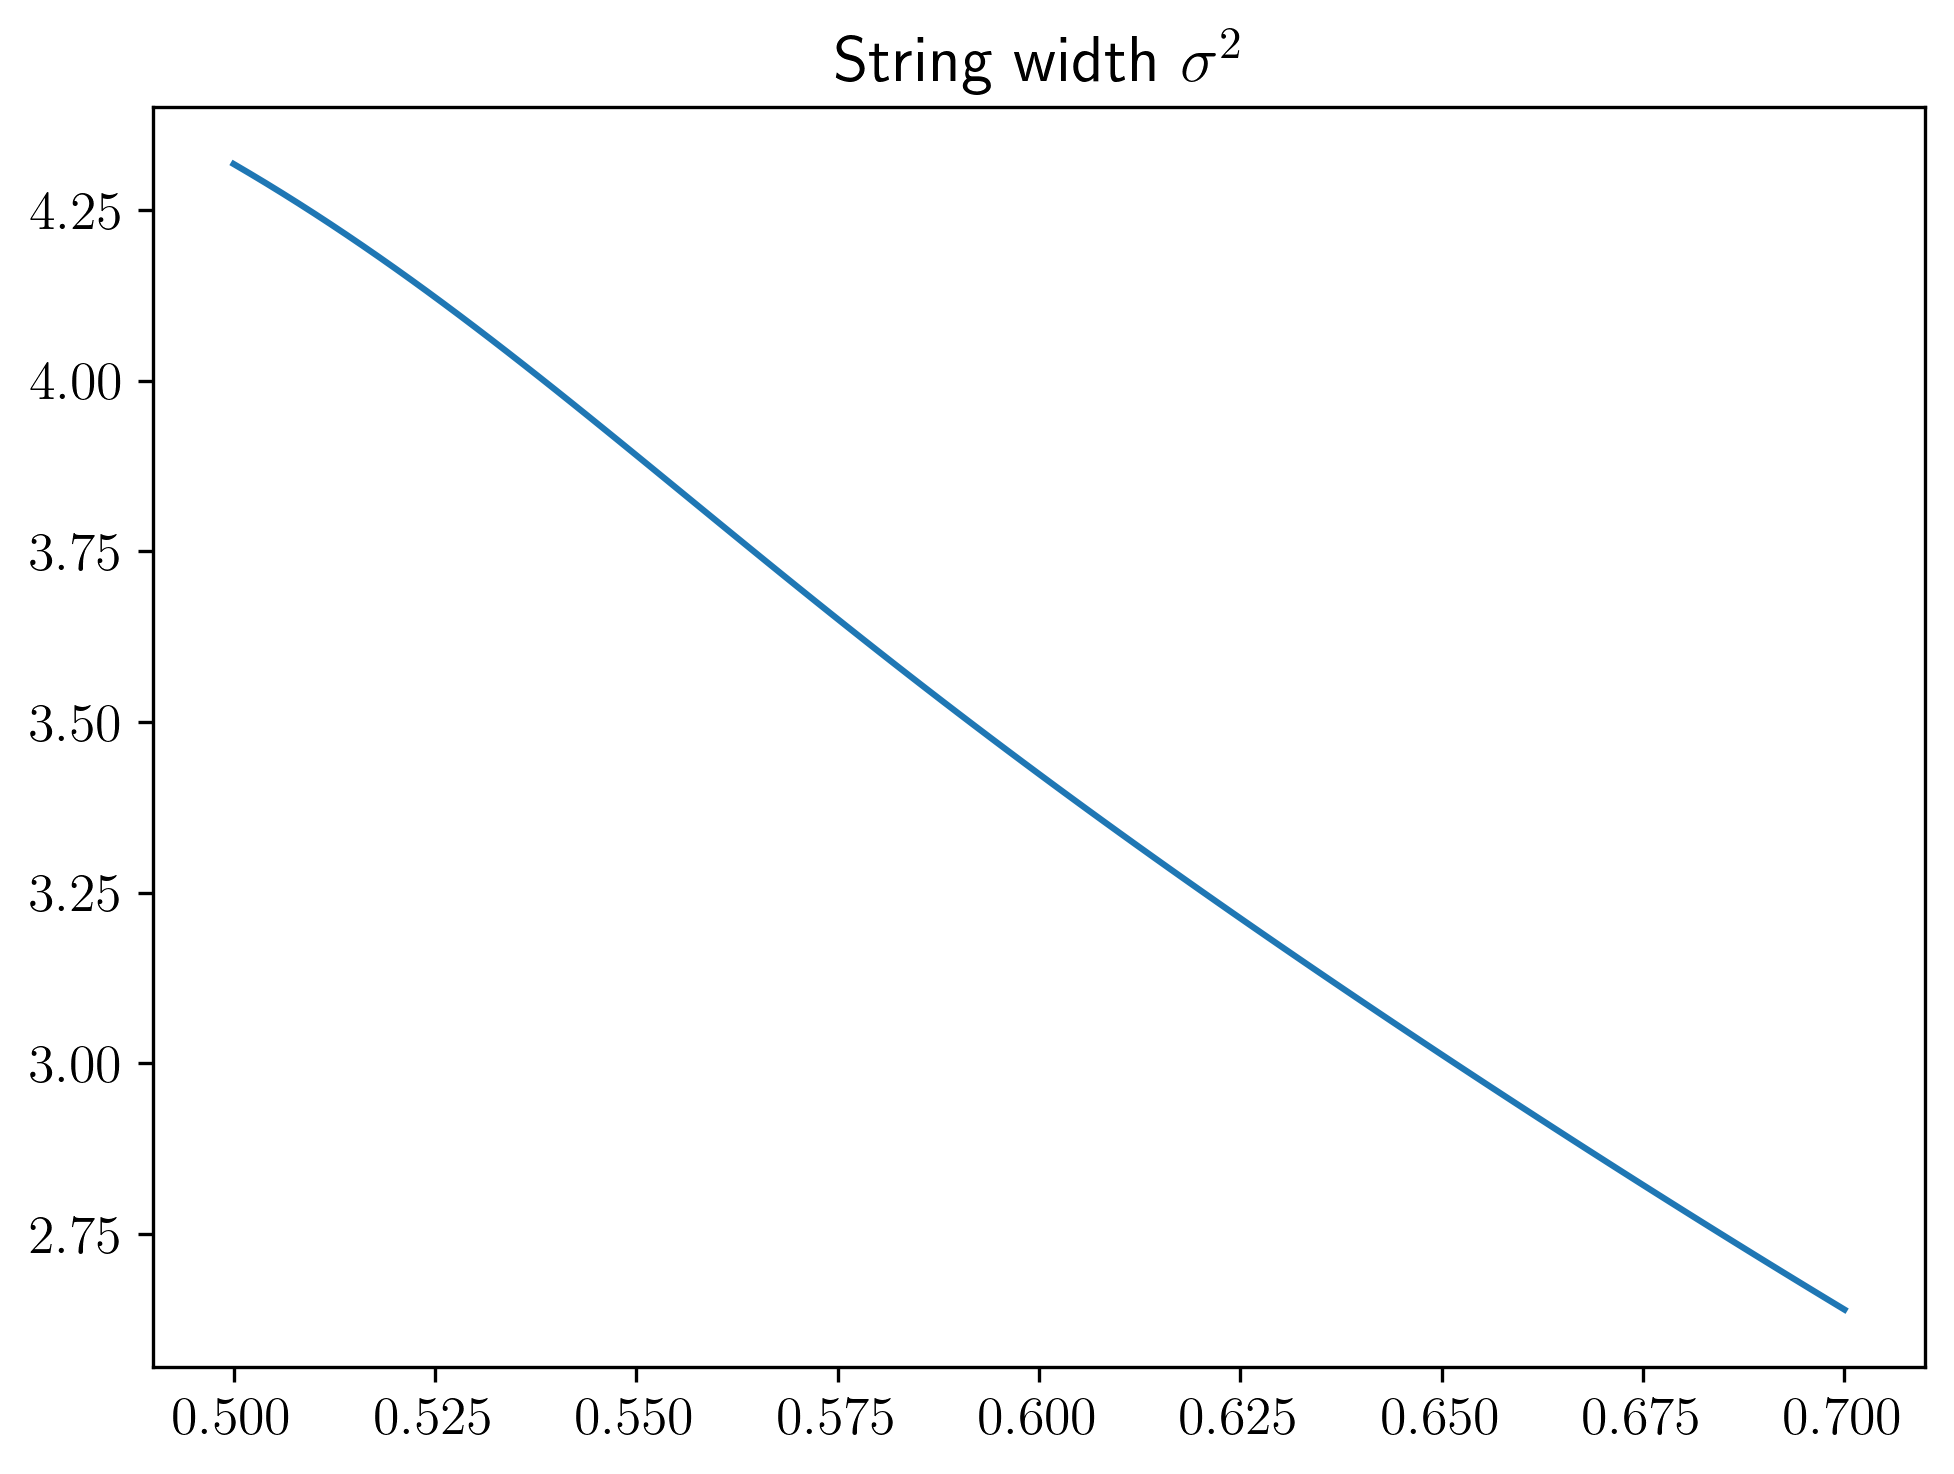

In [11]:
plt.title("String width $\sigma^2$")
plt.plot(interval, eed_string)
plt.show()